**Assignment Lab 2**

**MNIST**



Impoet the data

In [8]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

Explore Data

In [9]:
(xtr,ytr),(xte,yte)=mnist.load_data()

In [10]:
xtr.shape

(60000, 28, 28)

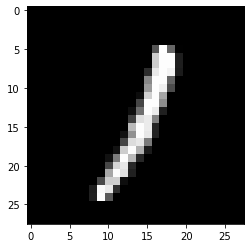

In [11]:
plt.imshow(xtr[99], cmap='gray')

In [12]:
ytr[99]

1

In [14]:
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],1).astype('float32')/255
ytr=tcg(ytr)
yte=tcg(yte)



Define the Model

In [16]:
model = Sequential([
  Flatten(input_shape=(28, 28, 1)),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

Train the Model

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
history = model.fit(xtr,ytr, validation_data=(xte,yte),epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 2s 10ms/step - loss: 0.3611 - accuracy: 0.8925 - val_loss: 8183.0366 - val_accuracy: 0.8432
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.3244 - accuracy: 0.9040 - val_loss: 7493.2334 - val_accuracy: 0.8587
Epoch 3/20
235/235 [==============================] - 2s 10ms/step - loss: 0.2959 - accuracy: 0.9119 - val_loss: 6837.2969 - val_accuracy: 0.8749
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.2703 - accuracy: 0.9193 - val_loss: 6656.4312 - val_accuracy: 0.8806
Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 0.2446 - accuracy: 0.9281 - val_loss: 5955.2222 - val_accuracy: 0.8956
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.2245 - accuracy: 0.9331 - val_loss: 5373.1587 - val_accuracy: 0.9099
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.2041 - accuracy: 0.9389 - val_loss: 5540.7466 - 

Evaluate the data

In [20]:
model.evaluate(xtr,ytr)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0845 - accuracy: 0.9746


[0.08445791155099869, 0.9745833277702332]

In [22]:
score = model.evaluate(xte,yte)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 5692.6050 - accuracy: 0.9176
Test loss: 5692.60498046875
Test accuracy: 0.9175999760627747


Plot Loss and accuracy curve

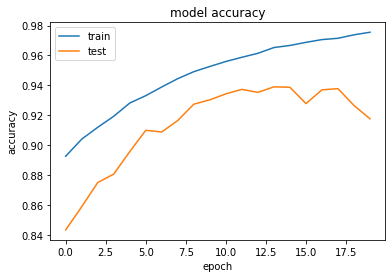

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

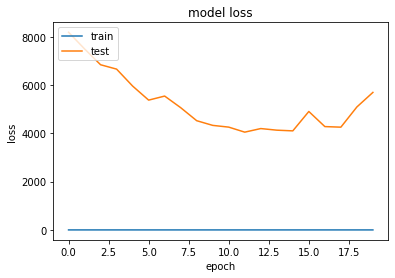

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Save the Model

In [25]:
model.save("mnist.h5")

Load the data

In [27]:
model.load_weights("mnist.h5")
loaded_model = tf.keras.models.load_model("mnist.h5")

loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


Prediction

In [33]:
xte.shape


(10000, 28, 28)

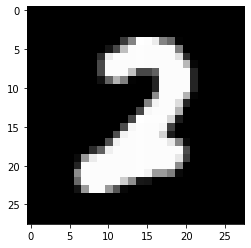

In [34]:
plt.imshow(xte[199], cmap='gray')

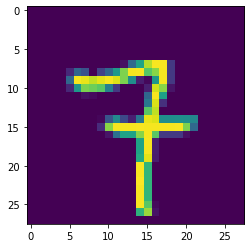

In [35]:
plt.imshow(xte[832])

In [36]:
print("Predicted sign: "+ str( 
        loaded_model.predict(xte[832].reshape(1, 28, 28, 1))))

print('---------------------------------------------------------------------------')

Predicted sign: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
---------------------------------------------------------------------------


In [43]:
print("Predicted Sign" + str(loaded_model.predict_classes(xte[832].reshape(1, 28, 28, 1))))

Predicted Sign[7]
